# Capstone project - Modeling pipeline
## Automated Valuation Model for HDB Properties
> Capstone project for the fulfilment of Data Science and AI certification with Institute of Data
- July 2021

## Dataset description
1. `flat_type` 
2. `storey_range`
3. `floor_area_sqm`
4. `Flat model`
5. `remaining_lease`
6. `mature_estate`
7. `distance_to_city`
8. `station_type`
9. `distance_to_station`
10. `distance_to_mall`
11. `new_supply_monthly`
12. `one_month_mov_avg` 
13. `three_month_mov_avg`
14. `resale_price`

### To be discarded
1. `town`
2. `address`


In [2]:
import numpy as np
import pandas as pd
import datetime, time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 7)

## Loading modeling pipeline dataset

In [4]:
df3 = pd.read_csv('capstone_dataset_final.csv', index_col='month', parse_dates=['month'])

In [5]:
df3.drop(columns=['town', 'address'], inplace=True)

In [6]:
df3.head()

flat_type  storey_range  floor_area_sqm      flat_model  \
month                                                                 
2017-01-31          2             4            44.0        Improved   
2017-01-31          3             1            67.0  New Generation   
2017-01-31          3             1            67.0  New Generation   
2017-01-31          3             2            68.0  New Generation   
2017-01-31          3             1            67.0  New Generation   

            remaining_lease  distance_to_city  station_type  \
month                                                         
2017-01-31        61.333333          8.663925             1   
2017-01-31        60.583333          9.769367             1   
2017-01-31        62.416667         10.887571             1   
2017-01-31        62.083333          9.148658             1   
2017-01-31        62.416667         10.928380             1   

            distance_to_station  distance_to_mall  mature_estate  \
month                                                              
2017-01-31             1.003997          1.006212              1   
2017-01-31             1.292522          0.896029              1   
2017-01-31             1.071179          1.530164              1   
2017-01-31             0.945529          0.879263              1   
2017-01-31             1.094010          1.574032              1   

            new_supply_monthly  one_month_mov_avg  three_month_mov_avg  \
month                                                                    
2017-01-31                2934           417612.5        414888.598644   
2017-01-31                2934           417612.5        414888.598644   
2017-01-31                2934           417612.5        414888.598644   
2017-01-31                2934           417612.5        414888.598644   
2017-01-31                2934           417612.5        414888.598644   

            resale_price  
month                     
2017-01-31      221000.0  
2017-01-31      238000.0  
2017-01-31      250000.0  
2017-01-31      253000.0  
2017-01-31      253000.0

In [7]:
df3.shape

(101303, 14)

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101303 entries, 2017-01-31 to 2021-06-30
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   flat_type            101303 non-null  int64  
 1   storey_range         101303 non-null  int64  
 2   floor_area_sqm       101303 non-null  float64
 3   flat_model           101303 non-null  object 
 4   remaining_lease      101303 non-null  float64
 5   distance_to_city     101303 non-null  float64
 6   station_type         101303 non-null  int64  
 7   distance_to_station  101303 non-null  float64
 8   distance_to_mall     101303 non-null  float64
 9   mature_estate        101303 non-null  int64  
 10  new_supply_monthly   101303 non-null  int64  
 11  one_month_mov_avg    101303 non-null  float64
 12  three_month_mov_avg  101303 non-null  float64
 13  resale_price         101303 non-null  float64
dtypes: float64(8), int64(5), object(1)
memory usage: 11.

## Apply Pandas Dummy Encoding
Using pandas get_dummies method to encode remaining categorical feature, `flat_model`

In [9]:
df3 = pd.get_dummies(df3, drop_first=True)

In [10]:
df3.sample(3)

flat_type  storey_range  floor_area_sqm  remaining_lease  \
month                                                                  
2021-02-28          5             8           110.0        86.583333   
2021-06-30          5             2           127.0        66.416667   
2018-06-30          4             5            95.0        93.416667   

            distance_to_city  station_type  distance_to_station  \
month                                                             
2021-02-28          6.141529             1             0.163980   
2021-06-30         19.208849             1             1.085363   
2018-06-30         12.167073             0             0.163011   

            distance_to_mall  mature_estate  new_supply_monthly  ...  \
month                                                            ...   
2021-02-28          1.083768              1                 358  ...   
2021-06-30          0.945043              0                 358  ...   
2018-06-30          0.134004              0                1463  ...   

            flat_model_Multi Generation  flat_model_New Generation  \
month                                                                
2021-02-28                            0                          0   
2021-06-30                            0                          0   
2018-06-30                            0                          0   

            flat_model_Premium Apartment  flat_model_Premium Apartment Loft  \
month                                                                         
2021-02-28                             0                                  0   
2021-06-30                             0                                  0   
2018-06-30                             1                                  0   

            flat_model_Premium Maisonette  flat_model_Simplified  \
month                                                              
2021-02-28                              0                      0   
2021-06-30                              0                      0   
2018-06-30                              0                      0   

            flat_model_Standard  flat_model_Terrace  flat_model_Type S1  \
month                                                                     
2021-02-28                    0                   0                   0   
2021-06-30                    0                   0                   0   
2018-06-30                    0                   0                   0   

            flat_model_Type S2  
month                           
2021-02-28                   0  
2021-06-30                   0  
2018-06-30                   0  

[3 rows x 32 columns]

## Splitting training and testing datasets
We have 2 alternatives to split the training and testing dataset
> Alternative 1: Splitting into 5 sets in order to do forward chaining cross validation

> Alternative 2: Splitting into one training set and one testing set

### Alternative 1
We have to take special care to split the test and training dataset. It needs to be sorted exactly by month, otherwise we may have data leakage from our test set into the training set. 

Feature engineering of the moving averages are based on previous months data. Hence if we have a month's worth of data split between training set and testing set, the moving average data of the testing set can be "seen" and "used" for training. 

In [1605]:
# set of code for possibly making forward chaining cross validation
"""
s1 = df3[df3.index.date < datetime.date(2018, 1, 1)]

s2 = df3[(df3.index.date > datetime.date(2018, 1, 1))\
        & (result_df2.index.date < datetime.date(2018, 12, 1))]

s3 = df3[(df3.index.date > datetime.date(2018, 12, 1))\
        & (result_df2.index.date < datetime.date(2019, 11, 1))]

s4 = df3[(df3.index.date > datetime.date(2019, 11, 1))\
        & (result_df2.index.date < datetime.date(2020, 10, 1))]

s5 = df3[(df3.index.date > datetime.date(2020, 10, 1))]

# Checking the length of each set to make sure they are as even as possible

print('length of each set:')
print('s1: {}'.format(len(s1)))
print('s2: {}'.format(len(s2)))
print('s3: {}'.format(len(s3)))
print('s4: {}'.format(len(s4)))
print('s5: {}'.format(len(s5)))
print('total: {}'.format(len(s1) + len(s2) + len(s3) + len(s4) + len(s5)))
""";

### Alternative 2
This alternative does not take into account for forward chaining cross validation. training-testing ratio split is approximately 80-20 as best as possible

In [11]:
s_train = df3[df3.index.date < datetime.date(2020, 10, 1)]

s_test = df3[(df3.index.date > datetime.date(2020, 10, 1))]

print('length of each set:')
print('s_train: {}'.format(len(s_train)))
print('s_test: {}'.format(len(s_test)))
print('total: {}'.format(len(s_train) + len(s_test)))

length of each set:
s_train: 80354
s_test: 20949
total: 101303


In [12]:
s_train.columns

Index(['flat_type', 'storey_range', 'floor_area_sqm', 'remaining_lease',
       'distance_to_city', 'station_type', 'distance_to_station',
       'distance_to_mall', 'mature_estate', 'new_supply_monthly',
       'one_month_mov_avg', 'three_month_mov_avg', 'resale_price',
       'flat_model_Adjoined flat', 'flat_model_Apartment', 'flat_model_DBSS',
       'flat_model_Improved', 'flat_model_Improved-Maisonette',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_New Generation',
       'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft',
       'flat_model_Premium Maisonette', 'flat_model_Simplified',
       'flat_model_Standard', 'flat_model_Terrace', 'flat_model_Type S1',
       'flat_model_Type S2'],
      dtype='object')

## Standaridise numerical features
We apply standardisation using StandardScaler to `floor_area_sqm`, `remaining_lease`, `distance_to_city`, `distance_to_station`, `distance_to_mall`, `new_supply_monthly`, `one_month_mov_avg`, `three_month_mov_avg` and `resale_price`

In [13]:
# apply standardscaler to some features
from sklearn.preprocessing import StandardScaler

In [14]:
columns_to_std = ['floor_area_sqm', 'remaining_lease', 'distance_to_city', 'distance_to_station', \
                  'distance_to_mall', 'new_supply_monthly', 'one_month_mov_avg', 'three_month_mov_avg']
target_col = ['resale_price']

s_train1 = s_train.drop(columns=columns_to_std+target_col)
s_train2 = s_train[columns_to_std]
s_train3 = s_train[target_col]

# scaling predictor variables
scaler_X = StandardScaler()
s_train2 = pd.DataFrame(scaler_X.fit_transform(s_train2), index=s_train.index, columns=columns_to_std)

# scaling target variable
scaler_y = StandardScaler()
s_train3 = pd.DataFrame(scaler_y.fit_transform(s_train3), index=s_train.index, columns=target_col)

s_train = pd.concat([s_train1, s_train2, s_train3], axis=1)

In [15]:
s_test1 = s_test.drop(columns=columns_to_std+target_col)

# scaling predictor variable
s_test2 = s_test[columns_to_std]
s_test2 = pd.DataFrame(scaler_X.transform(s_test2), index=s_test.index, columns=columns_to_std)

# scaling target variable
s_test3 = s_test[target_col]
s_test3 = pd.DataFrame(scaler_y.transform(s_test3), index=s_test.index, columns=target_col)

s_test = pd.concat([s_test1, s_test2, s_test3], axis=1)

In [16]:
s_test.sample(3).T

month                              2020-11-30  2020-10-31  2021-05-31
flat_type                            4.000000    5.000000    5.000000
storey_range                         9.000000    1.000000    4.000000
station_type                         0.000000    1.000000    0.000000
mature_estate                        0.000000    1.000000    0.000000
flat_model_Adjoined flat             0.000000    0.000000    0.000000
flat_model_Apartment                 0.000000    0.000000    0.000000
flat_model_DBSS                      0.000000    0.000000    0.000000
flat_model_Improved                  0.000000    1.000000    1.000000
flat_model_Improved-Maisonette       0.000000    0.000000    0.000000
flat_model_Maisonette                0.000000    0.000000    0.000000
flat_model_Model A                   1.000000    0.000000    0.000000
flat_model_Model A-Maisonette        0.000000    0.000000    0.000000
flat_model_Model A2                  0.000000    0.000000    0.000000
flat_model_Multi Generation          0.000000    0.000000    0.000000
flat_model_New Generation            0.000000    0.000000    0.000000
flat_model_Premium Apartment         0.000000    0.000000    0.000000
flat_model_Premium Apartment Loft    0.000000    0.000000    0.000000
flat_model_Premium Maisonette        0.000000    0.000000    0.000000
flat_model_Simplified                0.000000    0.000000    0.000000
flat_model_Standard                  0.000000    0.000000    0.000000
flat_model_Terrace                   0.000000    0.000000    0.000000
flat_model_Type S1                   0.000000    0.000000    0.000000
flat_model_Type S2                   0.000000    0.000000    0.000000
floor_area_sqm                      -0.231484    1.250863    0.509690
remaining_lease                      1.512612    0.035997    0.699498
distance_to_city                     0.683699    0.342315    0.209645
distance_to_station                  0.192844    2.849492   -1.187414
distance_to_mall                     0.341633    0.377254   -0.825597
new_supply_monthly                  -1.078020   -1.078020   -1.368031
one_month_mov_avg                    0.421039    0.847237    0.669656
three_month_mov_avg                  0.182724    0.948881    0.649400
resale_price                         0.403649    0.274153    0.377750

In [17]:
X_train = s_train.drop(columns='resale_price')
y_train = s_train['resale_price']
X_train_no_ma = X_train.drop(columns=['one_month_mov_avg', 'three_month_mov_avg'])
X_train_one_mth = X_train.drop(columns='three_month_mov_avg')
X_train_three_mth = X_train.drop(columns='one_month_mov_avg')

In [18]:
X_test = s_test.drop(columns='resale_price')
y_test = s_test['resale_price']
X_test_no_ma = X_test.drop(columns=['one_month_mov_avg', 'three_month_mov_avg'])
X_test_one_mth = X_test.drop(columns='three_month_mov_avg')
X_test_three_mth = X_test.drop(columns='one_month_mov_avg')

## Model Training

> We will use the following 3 models:
> 1. Support Vector Regressor
> 2. Gradient Boosting Regressor
> 3. Stacking Regressor
    - estimators: SVR, GBR, Lasso
    - final estimator: RidgeCV

> and apply them to 3 different datasets. 
> 1. Without any moving average as a feature
> 2. Using one month moving average as a feature
> 3. Using three months moving average as a feature.

>and evaluate with the following metrics
>1. adjusted r2
>2. MSLE
>3. MAPE
>4. error plots

In [19]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, RidgeCV
from sklearn.ensemble import StackingRegressor

from sklearn.metrics import r2_score, mean_squared_log_error, \
                            mean_absolute_percentage_error, mean_squared_error


### Generate original test dataset of target variable

In [20]:
y_test_inv = scaler_y.inverse_transform(y_test)
y_test_inv

array([222000., 272000., 484000., ..., 600000., 570000., 715000.])

In [21]:
y_test_inv_df = pd.DataFrame(y_test_inv, columns=['resale_price'])
y_test_inv_df

resale_price
0          222000.0
1          272000.0
2          484000.0
3          358000.0
4          319000.0
...             ...
20944      615000.0
20945      585000.0
20946      600000.0
20947      570000.0
20948      715000.0

[20949 rows x 1 columns]

In [22]:
r2_score_df = pd.DataFrame(columns=['none', 'one_mth_ma', 'three_mth_ma'])
msle_score_df = pd.DataFrame(columns=['none', 'one_mth_ma', 'three_mth_ma'])
mape_score_df = pd.DataFrame(columns=['none', 'one_mth_ma', 'three_mth_ma'])
#rmse_score_df = pd.DataFrame(columns=['none', 'one_mth_ma', 'three_mth_ma'])

In [23]:
y_pred_df = pd.DataFrame()

### Gradient Boosting Regressor Baseline

In [24]:
%%time
# no moving average
regr_gbr = GradientBoostingRegressor(random_state=2)
regr_gbr.fit(X_train_no_ma, y_train)

y_pred_no_ma = regr_gbr.predict(X_test_no_ma)
r2_score_no_ma = r2_score(y_pred_no_ma, y_test)

y_pred_no_ma_inv = scaler_y.inverse_transform(y_pred_no_ma)
msle_score_no_ma = mean_squared_log_error(y_pred_no_ma_inv, y_test_inv)
mape_score_no_ma = mean_absolute_percentage_error(y_pred_no_ma_inv, y_test_inv)
#rmse_score_no_ma = mean_absolute_percentage_error(y_pred_no_ma_inv, y_test_inv, squared=False)

Wall time: 12 s


In [25]:
%%time
# using one month moving average
regr_gbr = GradientBoostingRegressor(random_state=2)
regr_gbr.fit(X_train_one_mth, y_train)

y_pred_one_mth = regr_gbr.predict(X_test_one_mth)
r2_score_one_mth = r2_score(y_pred_one_mth, y_test)

y_pred_one_mth_inv = scaler_y.inverse_transform(y_pred_one_mth)
msle_score_one_mth = mean_squared_log_error(y_pred_one_mth_inv, y_test_inv)
mape_score_one_mth = mean_absolute_percentage_error(y_pred_one_mth_inv, y_test_inv)

Wall time: 12.8 s


In [26]:
%%time
# using three month moving average
regr_gbr = GradientBoostingRegressor(random_state=2)
regr_gbr.fit(X_train_three_mth, y_train)

y_pred_three_mth = regr_gbr.predict(X_test_three_mth)
r2_score_three_mth = r2_score(y_pred_three_mth, y_test)

y_pred_three_mth_inv = scaler_y.inverse_transform(y_pred_three_mth)
msle_score_three_mth = mean_squared_log_error(y_pred_three_mth_inv, y_test_inv)
mape_score_three_mth = mean_absolute_percentage_error(y_pred_three_mth_inv, y_test_inv)

Wall time: 13.2 s


In [27]:
r2_score_df.loc['GBR bm'] = {
    'none': r2_score_no_ma,
    'one_mth_ma': r2_score_one_mth,
    'three_mth_ma': r2_score_three_mth
}

msle_score_df.loc['GBR bm'] = {
    'none': msle_score_no_ma,
    'one_mth_ma': msle_score_one_mth,
    'three_mth_ma': msle_score_three_mth
}

mape_score_df.loc['GBR bm'] = {
    'none': mape_score_no_ma,
    'one_mth_ma': mape_score_one_mth,
    'three_mth_ma': mape_score_three_mth
}


y_pred_df['GBR_no_ma_bm'] = y_pred_no_ma_inv
y_pred_df['GBR_one_mth_bm'] = y_pred_one_mth_inv
y_pred_df['GBR_three_mth_bm'] = y_pred_three_mth_inv

### Stacking Regressor Baseline

In [28]:
estimators = [
    ('sgdr', SGDRegressor(random_state=2)),
    ('gbr', GradientBoostingRegressor(random_state=2)), 
    ('lasso', Lasso(random_state=2))
]

In [29]:
%%time
# no moving average
regr_stack = StackingRegressor(estimators=estimators, final_estimator = RidgeCV(), n_jobs=-1)
regr_stack.fit(X_train_no_ma, y_train)

y_pred_no_ma = regr_stack.predict(X_test_no_ma)
y_pred_no_ma_inv = scaler_y.inverse_transform(y_pred_no_ma)

r2_score_no_ma = r2_score(y_pred_no_ma, y_test)
msle_score_no_ma = mean_squared_log_error(y_pred_no_ma_inv, y_test_inv)
mape_score_no_ma = mean_absolute_percentage_error(y_pred_no_ma_inv, y_test_inv)

Wall time: 28 s


In [30]:
%%time
# using one month moving average
regr_stack = StackingRegressor(estimators=estimators, final_estimator = RidgeCV(), n_jobs=-1)
regr_stack.fit(X_train_one_mth, y_train)

y_pred_one_mth = regr_stack.predict(X_test_one_mth)
r2_score_one_mth = r2_score(y_pred_one_mth, y_test)

y_pred_one_mth_inv = scaler_y.inverse_transform(y_pred_one_mth)
msle_score_one_mth = mean_squared_log_error(y_pred_one_mth_inv, y_test_inv)
mape_score_one_mth = mean_absolute_percentage_error(y_pred_one_mth_inv, y_test_inv)

Wall time: 33.8 s


In [31]:
%%time
# using three month moving average
regr_stack = StackingRegressor(estimators=estimators, final_estimator = RidgeCV(), n_jobs=-1)
regr_stack.fit(X_train_three_mth, y_train)

y_pred_three_mth = regr_stack.predict(X_test_three_mth)
r2_score_three_mth = r2_score(y_pred_three_mth, y_test)

y_pred_three_mth_inv = scaler_y.inverse_transform(y_pred_three_mth)
msle_score_three_mth = mean_squared_log_error(y_pred_three_mth_inv, y_test_inv)
mape_score_three_mth = mean_absolute_percentage_error(y_pred_three_mth_inv, y_test_inv)

Wall time: 36.1 s


In [32]:
r2_score_df.loc['Stack bm'] = {
    'none': r2_score_no_ma,
    'one_mth_ma': r2_score_one_mth,
    'three_mth_ma': r2_score_three_mth
}

msle_score_df.loc['Stack bm'] = {
    'none': msle_score_no_ma,
    'one_mth_ma': msle_score_one_mth,
    'three_mth_ma': msle_score_three_mth
}

mape_score_df.loc['Stack bm'] = {
    'none': mape_score_no_ma,
    'one_mth_ma': mape_score_one_mth,
    'three_mth_ma': mape_score_three_mth
}

y_pred_df['Stack_no_ma_bm'] = y_pred_no_ma_inv
y_pred_df['Stack_one_mth_bm'] = y_pred_one_mth_inv
y_pred_df['Stack_three_mth_bm'] = y_pred_three_mth_inv

### SVR Regressor Baseline

In [40]:
%%time
# no moving average
regr_svr = SVR()
regr_svr.fit(X_train_no_ma, y_train)

y_pred_no_ma = regr_svr.predict(X_test_no_ma)
r2_score_no_ma = r2_score(y_pred_no_ma, y_test)

y_pred_no_ma_inv = scaler_y.inverse_transform(y_pred_no_ma)
msle_score_no_ma = mean_squared_log_error(y_pred_no_ma_inv, y_test_inv)
mape_score_no_ma = mean_absolute_percentage_error(y_pred_no_ma_inv, y_test_inv)

Wall time: 6min 20s


In [41]:
%%time
# using one month moving average
regr_svr = SVR()
regr_svr.fit(X_train_one_mth, y_train)

y_pred_one_mth = regr_svr.predict(X_test_one_mth)
r2_score_one_mth = r2_score(y_pred_one_mth, y_test)

y_pred_one_mth_inv = scaler_y.inverse_transform(y_pred_one_mth)
msle_score_one_mth = mean_squared_log_error(y_pred_one_mth_inv, y_test_inv)
mape_score_one_mth = mean_absolute_percentage_error(y_pred_one_mth_inv, y_test_inv)

Wall time: 6min 29s


In [42]:
%%time
# using three month moving average
regr_svr = SVR()
regr_svr.fit(X_train_three_mth, y_train)

y_pred_three_mth = regr_svr.predict(X_test_three_mth)
r2_score_three_mth = r2_score(y_pred_three_mth, y_test)

y_pred_three_mth_inv = scaler_y.inverse_transform(y_pred_three_mth)
msle_score_three_mth = mean_squared_log_error(y_pred_three_mth_inv, y_test_inv)
mape_score_three_mth = mean_absolute_percentage_error(y_pred_three_mth_inv, y_test_inv)

Wall time: 6min 20s


In [43]:
r2_score_df.loc['SVR bm'] = {
    'none': r2_score_no_ma,
    'one_mth_ma': r2_score_one_mth,
    'three_mth_ma': r2_score_three_mth
}

msle_score_df.loc['SVR bm'] = {
    'none': msle_score_no_ma,
    'one_mth_ma': msle_score_one_mth,
    'three_mth_ma': msle_score_three_mth
}

mape_score_df.loc['SVR bm'] = {
    'none': mape_score_no_ma,
    'one_mth_ma': mape_score_one_mth,
    'three_mth_ma': mape_score_three_mth
}

y_pred_df['SVR_no_ma_bm'] = y_pred_no_ma_inv
y_pred_df['SVR_one_mth_bm'] = y_pred_one_mth_inv
y_pred_df['SVR_three_mth_bm'] = y_pred_three_mth_inv

## Understanding feature importance
Using Lasso Regressor to evaluate feature importance

In [134]:
from sklearn.feature_selection import SelectFromModel

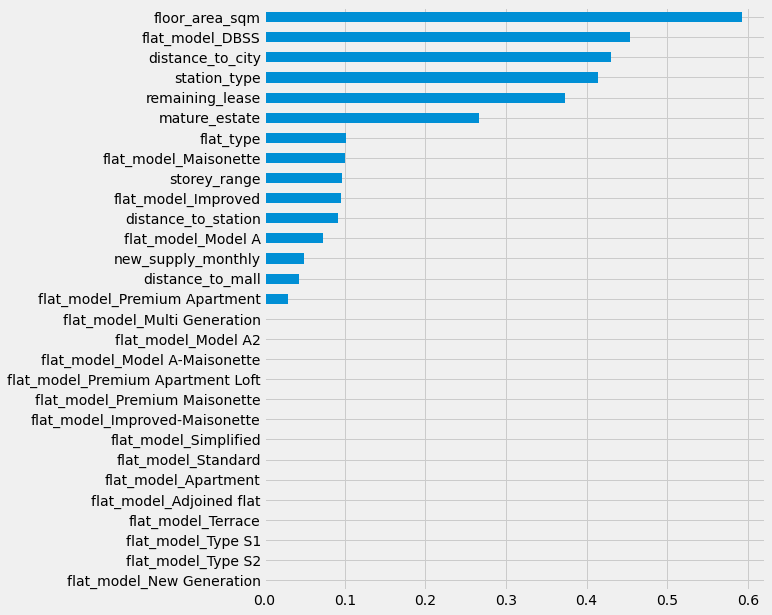

Wall time: 413 ms


In [146]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
fig.patch.set_facecolor('#353537')
ax.set_facecolor('#353537')
[s.set_visible(False) for s in ax.spines.values()]
ax.tick_params(axis='both', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

selector = SelectFromModel(Lasso(alpha=0.005, random_state=2))
selector.fit(X_train_no_ma, y_train)
importance = pd.Series(np.abs(selector.estimator_.coef_.ravel()))
importance.index = X_train_no_ma.columns
importance.sort_values(inplace=True)
importance.plot.barh()
plt.grid(axis='y')

plt.show()

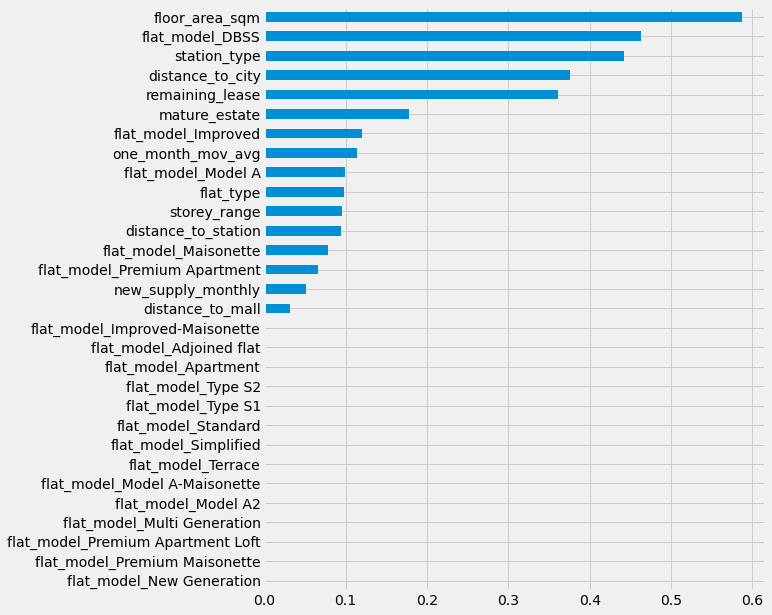

Wall time: 471 ms


In [145]:
%%time
selector = SelectFromModel(Lasso(alpha=0.005, random_state=2))
selector.fit(X_train_one_mth, y_train)
importance = pd.Series(np.abs(selector.estimator_.coef_.ravel()))
importance.index = X_train_one_mth.columns
importance.sort_values(inplace=True)
importance.plot.barh(figsize=(8, 10))
plt.show()

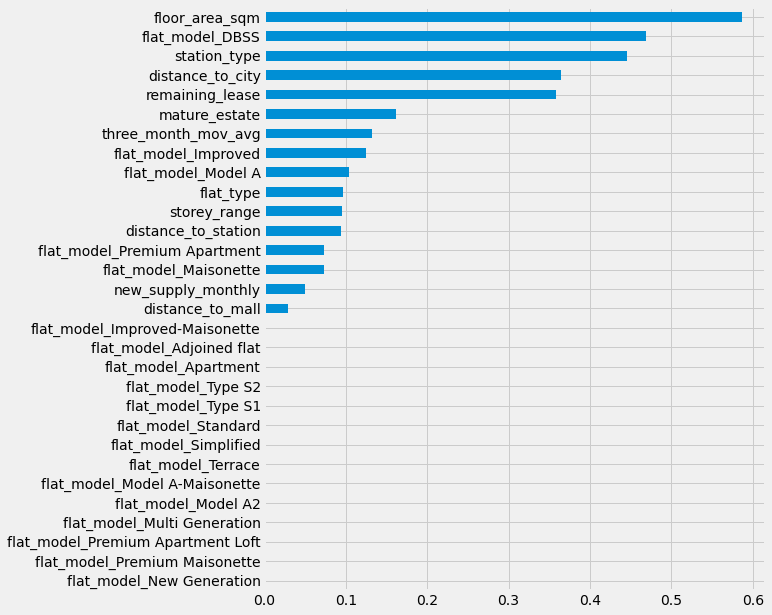

Wall time: 438 ms


In [148]:
%%time

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
fig.patch.set_facecolor('#353537')
ax.set_facecolor('#353537')
[s.set_visible(False) for s in ax.spines.values()]
ax.tick_params(axis='both', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

selector = SelectFromModel(Lasso(alpha=0.005, random_state=2))
selector.fit(X_train_three_mth, y_train)
importance = pd.Series(np.abs(selector.estimator_.coef_.ravel()))
importance.index = X_train_three_mth.columns
importance.sort_values(inplace=True)
importance.plot.barh(figsize=(8, 10))
ax.grid(axis='y')
plt.show()

## Feature selection
We did not have too many features to begin with. And did not see lasso bringing any coefficient of significant features to 0. We will not remove `flat_models` that have been encoded as some of the types have high importance according to lasso evaluation

However, we will attempt to remove `flat_type` as our correlation matrix earlier highlighted some degree of independence with another feature, `floor_area_sqm`. 

In [33]:
features_to_drop = 'flat_type'

In [34]:
X_train_no_ma_fs = X_train_no_ma.drop(columns=features_to_drop)
X_train_one_mth_fs = X_train_one_mth.drop(columns=features_to_drop)
X_train_three_mth_fs = X_train_three_mth.drop(columns=features_to_drop)

In [35]:
X_test_no_ma_fs = X_test_no_ma.drop(columns=features_to_drop)
X_test_one_mth_fs = X_test_one_mth.drop(columns=features_to_drop)
X_test_three_mth_fs = X_test_three_mth.drop(columns=features_to_drop)

### Gradient Boosting Regressor Feature Selection

In [36]:
%%time
# no moving average
regr_gbr = GradientBoostingRegressor(random_state=2)
regr_gbr.fit(X_train_no_ma_fs, y_train)

y_pred_no_ma = regr_gbr.predict(X_test_no_ma_fs)
r2_score_no_ma = r2_score(y_pred_no_ma, y_test)

y_pred_no_ma_inv = scaler_y.inverse_transform(y_pred_no_ma)
msle_score_no_ma = mean_squared_log_error(y_pred_no_ma_inv, y_test_inv)
mape_score_no_ma = mean_absolute_percentage_error(y_pred_no_ma_inv, y_test_inv)

Wall time: 11.2 s


In [37]:
%%time
# using one month moving average
regr_gbr = GradientBoostingRegressor(random_state=2)
regr_gbr.fit(X_train_one_mth_fs, y_train)

y_pred_one_mth = regr_gbr.predict(X_test_one_mth_fs)
r2_score_one_mth = r2_score(y_pred_one_mth, y_test)

y_pred_one_mth_inv = scaler_y.inverse_transform(y_pred_one_mth)
msle_score_one_mth = mean_squared_log_error(y_pred_one_mth_inv, y_test_inv)
mape_score_one_mth = mean_absolute_percentage_error(y_pred_one_mth_inv, y_test_inv)

Wall time: 12.6 s


In [38]:
%%time
# using three month moving average
regr_gbr = GradientBoostingRegressor(random_state=2)
regr_gbr.fit(X_train_three_mth_fs, y_train)

y_pred_three_mth = regr_gbr.predict(X_test_three_mth_fs)
r2_score_three_mth = r2_score(y_pred_three_mth, y_test)

y_pred_three_mth_inv = scaler_y.inverse_transform(y_pred_three_mth)
msle_score_three_mth = mean_squared_log_error(y_pred_three_mth_inv, y_test_inv)
mape_score_three_mth = mean_absolute_percentage_error(y_pred_three_mth_inv, y_test_inv)

Wall time: 12.5 s


In [39]:
r2_score_df.loc['GBR fs'] = {
    'none': r2_score_no_ma,
    'one_mth_ma': r2_score_one_mth,
    'three_mth_ma': r2_score_three_mth
}

msle_score_df.loc['GBR fs'] = {
    'none': msle_score_no_ma,
    'one_mth_ma': msle_score_one_mth,
    'three_mth_ma': msle_score_three_mth
}

mape_score_df.loc['GBR fs'] = {
    'none': mape_score_no_ma,
    'one_mth_ma': mape_score_one_mth,
    'three_mth_ma': mape_score_three_mth
}

y_pred_df['GBR_no_ma_fs'] = y_pred_no_ma_inv
y_pred_df['GBR_one_mth_fs'] = y_pred_one_mth_inv
y_pred_df['GBR_three_mth_fs'] = y_pred_three_mth_inv

### Stacking Regressor Feature Selection

In [40]:
estimators = [
    ('sgdr', SGDRegressor(random_state=2)),
    ('gbr', GradientBoostingRegressor(random_state=2)), 
    ('lasso', Lasso(random_state=2))
]

In [41]:
%%time
# no moving average
regr_stack = StackingRegressor(estimators=estimators, final_estimator = RidgeCV(), n_jobs=-1)
regr_stack.fit(X_train_no_ma_fs, y_train)

y_pred_no_ma = regr_stack.predict(X_test_no_ma_fs)
y_pred_no_ma_inv = scaler_y.inverse_transform(y_pred_no_ma)

r2_score_no_ma = r2_score(y_pred_no_ma, y_test)
msle_score_no_ma = mean_squared_log_error(y_pred_no_ma_inv, y_test_inv)
mape_score_no_ma = mean_absolute_percentage_error(y_pred_no_ma_inv, y_test_inv)

Wall time: 34.5 s


In [42]:
%%time
# using one month moving average
regr_stack = StackingRegressor(estimators=estimators, final_estimator = RidgeCV(), n_jobs=-1)
regr_stack.fit(X_train_one_mth_fs, y_train)

y_pred_one_mth = regr_stack.predict(X_test_one_mth_fs)
r2_score_one_mth = r2_score(y_pred_one_mth, y_test)

y_pred_one_mth_inv = scaler_y.inverse_transform(y_pred_one_mth)
msle_score_one_mth = mean_squared_log_error(y_pred_one_mth_inv, y_test_inv)
mape_score_one_mth = mean_absolute_percentage_error(y_pred_one_mth_inv, y_test_inv)

Wall time: 37.9 s


In [43]:
%%time
# using three month moving average
regr_stack = StackingRegressor(estimators=estimators, final_estimator = RidgeCV(), n_jobs=-1)
regr_stack.fit(X_train_three_mth_fs, y_train)

y_pred_three_mth = regr_stack.predict(X_test_three_mth_fs)
r2_score_three_mth = r2_score(y_pred_three_mth, y_test)

y_pred_three_mth_inv = scaler_y.inverse_transform(y_pred_three_mth)
msle_score_three_mth = mean_squared_log_error(y_pred_three_mth_inv, y_test_inv)
mape_score_three_mth = mean_absolute_percentage_error(y_pred_three_mth_inv, y_test_inv)

Wall time: 40.8 s


In [44]:
r2_score_df.loc['Stack fs'] = {
    'none': r2_score_no_ma,
    'one_mth_ma': r2_score_one_mth,
    'three_mth_ma': r2_score_three_mth
}

msle_score_df.loc['Stack fs'] = {
    'none': msle_score_no_ma,
    'one_mth_ma': msle_score_one_mth,
    'three_mth_ma': msle_score_three_mth
}

mape_score_df.loc['Stack fs'] = {
    'none': mape_score_no_ma,
    'one_mth_ma': mape_score_one_mth,
    'three_mth_ma': mape_score_three_mth
}

y_pred_df['Stack_no_ma_fs'] = y_pred_no_ma_inv
y_pred_df['Stack_one_mth_fs'] = y_pred_one_mth_inv
y_pred_df['Stack_three_mth_fs'] = y_pred_three_mth_inv

### Support Vector Regressor Feature Selection

In [56]:
%%time
# no moving average
regr_svr = SVR()
regr_svr.fit(X_train_no_ma_fs, y_train)

y_pred_no_ma = regr_svr.predict(X_test_no_ma_fs)
r2_score_no_ma = r2_score(y_pred_no_ma, y_test)

y_pred_no_ma_inv = scaler_y.inverse_transform(y_pred_no_ma)
msle_score_no_ma = mean_squared_log_error(y_pred_no_ma_inv, y_test_inv)
mape_score_no_ma = mean_absolute_percentage_error(y_pred_no_ma_inv, y_test_inv)

Wall time: 7min 17s


In [57]:
%%time
# using one month moving average
regr_svr = SVR()
regr_svr.fit(X_train_one_mth_fs, y_train)

y_pred_one_mth = regr_svr.predict(X_test_one_mth_fs)
r2_score_one_mth = r2_score(y_pred_one_mth, y_test)

y_pred_one_mth_inv = scaler_y.inverse_transform(y_pred_one_mth)
msle_score_one_mth = mean_squared_log_error(y_pred_one_mth_inv, y_test_inv)
mape_score_one_mth = mean_absolute_percentage_error(y_pred_one_mth_inv, y_test_inv)

Wall time: 7min 56s


In [58]:
%%time
# using three month moving average
regr_svr = SVR()
regr_svr.fit(X_train_three_mth_fs, y_train)

y_pred_three_mth = regr_svr.predict(X_test_three_mth_fs)
r2_score_three_mth = r2_score(y_pred_three_mth, y_test)

y_pred_three_mth_inv = scaler_y.inverse_transform(y_pred_three_mth)
msle_score_three_mth = mean_squared_log_error(y_pred_three_mth_inv, y_test_inv)
mape_score_three_mth = mean_absolute_percentage_error(y_pred_three_mth_inv, y_test_inv)

Wall time: 7min 56s


In [59]:
r2_score_df.loc['SVR fs'] = {
    'none': r2_score_no_ma,
    'one_mth_ma': r2_score_one_mth,
    'three_mth_ma': r2_score_three_mth
}

msle_score_df.loc['SVR fs'] = {
    'none': msle_score_no_ma,
    'one_mth_ma': msle_score_one_mth,
    'three_mth_ma': msle_score_three_mth
}

mape_score_df.loc['SVR fs'] = {
    'none': mape_score_no_ma,
    'one_mth_ma': mape_score_one_mth,
    'three_mth_ma': mape_score_three_mth
}

y_pred_df['SVR_no_ma_fs'] = y_pred_no_ma_inv
y_pred_df['SVR_one_mth_fs'] = y_pred_one_mth_inv
y_pred_df['SVR_three_mth_fs'] = y_pred_three_mth_inv

## Hyperparameter tuning

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [390]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### Gradient Boosting RandomizedSearchCV

In [156]:
%%time
# three moving average
#scoring = ['r2', 'neg_mean_squared_log_error', 'neg_mean_absolute_percentage_error']
scoring = 'r2'

regr_gbr = GradientBoostingRegressor(random_state=2)
gbr_params = {'n_estimators':[500, 750, ], 'learning_rate':[0.01, 0.05], 
              'max_depth':[4, 5],'subsample':[.4, .5]}
r_search_gbr = RandomizedSearchCV(estimator=regr_gbr, param_distributions=gbr_params, 
                                  scoring=scoring, n_jobs=1, error_score='raise')

r_search_gbr.fit(X_train_three_mth, y_train)

Wall time: 4h 18min 34s


RandomizedSearchCV(error_score='raise',
                   estimator=GradientBoostingRegressor(random_state=2),
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.005, 0.01, 0.05],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [500, 750, 1000],
                                        'subsample': [0.4, 0.5, 0.6]},
                   scoring='r2')

In [157]:
r_search_best_score_gbr = r_search_gbr.best_score_
r_search_best_score_gbr

0.9547819273694438

In [158]:
r_search_best_params = r_search_gbr.best_params_
r_search_best_params

{'subsample': 0.5, 'n_estimators': 750, 'max_depth': 5, 'learning_rate': 0.05}

### Stacking no RandomizedSearchCV, but passthrough = True

In [161]:
estimators = [
    ('sgdr', SGDRegressor(random_state=2)),
    ('gbr', GradientBoostingRegressor(random_state=2)), 
    ('lasso', Lasso(random_state=2))
]

In [162]:
%%time
# no moving average
regr_stack = StackingRegressor(estimators=estimators, final_estimator=RidgeCV(), \
                               passthrough=True, n_jobs=-1)
regr_stack.fit(X_train_three_mth, y_train)
regr_stack.score(X_test_three_mth, y_test)

Wall time: 33 s


0.9153079561244027

### SVR, RandomisedSearchCV

In [405]:
%%time
# three moving average
# kernel=‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, coef0=0.0, tol=0.001, C=1.0, epsilon=0.1,  
scoring = 'r2'

regr_svr = SVR()
svr_params = {'kernel':['poly', 'rbf'], 'C':[1, 10], 
              'gamma':['scale', 'auto']}
r_search_svr = RandomizedSearchCV(estimator=regr_svr, param_distributions=svr_params, 
                                  scoring=scoring, n_jobs=1, error_score='raise')

r_search_svr.fit(X_train_three_mth_fs, y_train)

KeyboardInterrupt: 

In [399]:
r_search_best_score_svr = r_search_svr.best_score_
r_search_best_score_svr

0.9533761205056772

In [400]:
r_search_best_params_svr = r_search_gbr.best_params_
r_search_best_params_svr

{'subsample': 0.5, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05}

## Final run

### Gradient Boosting Regressor Final

In [45]:
%%time
# no moving average
regr_gbr = GradientBoostingRegressor(subsample=0.5, n_estimators=750, max_depth=5, \
                                     learning_rate=0.05, random_state=2)
regr_gbr.fit(X_train_no_ma, y_train)

y_pred_no_ma = regr_gbr.predict(X_test_no_ma)
r2_score_no_ma = r2_score(y_pred_no_ma, y_test)

y_pred_no_ma_inv = scaler_y.inverse_transform(y_pred_no_ma)
msle_score_no_ma = mean_squared_log_error(y_pred_no_ma_inv, y_test_inv)
mape_score_no_ma = mean_absolute_percentage_error(y_pred_no_ma_inv, y_test_inv)

Wall time: 1min 30s


In [46]:
%%time
# using one month moving average
regr_gbr = GradientBoostingRegressor(subsample=0.5, n_estimators=750, max_depth=5, \
                                     learning_rate=0.05, random_state=2)
regr_gbr.fit(X_train_one_mth, y_train)

y_pred_one_mth = regr_gbr.predict(X_test_one_mth)
r2_score_one_mth = r2_score(y_pred_one_mth, y_test)

y_pred_one_mth_inv = scaler_y.inverse_transform(y_pred_one_mth)
msle_score_one_mth = mean_squared_log_error(y_pred_one_mth_inv, y_test_inv)
mape_score_one_mth = mean_absolute_percentage_error(y_pred_one_mth_inv, y_test_inv)

Wall time: 1min 47s


In [47]:
%%time
# using three month moving average
regr_gbr = GradientBoostingRegressor(subsample=0.5, n_estimators=750, max_depth=5, \
                                     learning_rate=0.05, random_state=2)
regr_gbr.fit(X_train_three_mth, y_train)

y_pred_three_mth = regr_gbr.predict(X_test_three_mth)
r2_score_three_mth = r2_score(y_pred_three_mth, y_test)

y_pred_three_mth_inv = scaler_y.inverse_transform(y_pred_three_mth)
msle_score_three_mth = mean_squared_log_error(y_pred_three_mth_inv, y_test_inv)
mape_score_three_mth = mean_absolute_percentage_error(y_pred_three_mth_inv, y_test_inv)

Wall time: 1min 56s


In [48]:
r2_score_df.loc['GBR final'] = {
    'none': r2_score_no_ma,
    'one_mth_ma': r2_score_one_mth,
    'three_mth_ma': r2_score_three_mth
}

msle_score_df.loc['GBR final'] = {
    'none': msle_score_no_ma,
    'one_mth_ma': msle_score_one_mth,
    'three_mth_ma': msle_score_three_mth
}

mape_score_df.loc['GBR final'] = {
    'none': mape_score_no_ma,
    'one_mth_ma': mape_score_one_mth,
    'three_mth_ma': mape_score_three_mth
}

y_pred_df['GBR_no_ma_final'] = y_pred_no_ma_inv
y_pred_df['GBR_one_mth_final'] = y_pred_one_mth_inv
y_pred_df['GBR_three_mth_final'] = y_pred_three_mth_inv

### Stacking Regressor Final

In [49]:
estimators = [
    ('sgdr', SGDRegressor(random_state=2)),
    ('gbr', GradientBoostingRegressor(random_state=2)), 
    ('lasso', Lasso(random_state=2))
]

In [50]:
%%time
# no moving average
regr_stack = StackingRegressor(estimators=estimators, final_estimator=RidgeCV(), \
                               passthrough=True, n_jobs=-1)
regr_stack.fit(X_train_no_ma, y_train)

y_pred_no_ma = regr_stack.predict(X_test_no_ma)
y_pred_no_ma_inv = scaler_y.inverse_transform(y_pred_no_ma)

r2_score_no_ma = r2_score(y_pred_no_ma, y_test)
msle_score_no_ma = mean_squared_log_error(y_pred_no_ma_inv, y_test_inv)
mape_score_no_ma = mean_absolute_percentage_error(y_pred_no_ma_inv, y_test_inv)

Wall time: 45.7 s


In [51]:
%%time
# using one month moving average
regr_stack = StackingRegressor(estimators=estimators, final_estimator=RidgeCV(), \
                               passthrough=True, n_jobs=-1)
regr_stack.fit(X_train_one_mth, y_train)

y_pred_one_mth = regr_stack.predict(X_test_one_mth)
r2_score_one_mth = r2_score(y_pred_one_mth, y_test)

y_pred_one_mth_inv = scaler_y.inverse_transform(y_pred_one_mth)
msle_score_one_mth = mean_squared_log_error(y_pred_one_mth_inv, y_test_inv)
mape_score_one_mth = mean_absolute_percentage_error(y_pred_one_mth_inv, y_test_inv)

Wall time: 46.4 s


In [52]:
%%time
# using three month moving average
regr_stack = StackingRegressor(estimators=estimators, final_estimator=RidgeCV(), \
                               passthrough=True, n_jobs=-1)
regr_stack.fit(X_train_three_mth, y_train)

y_pred_three_mth = regr_stack.predict(X_test_three_mth)
r2_score_three_mth = r2_score(y_pred_three_mth, y_test)

y_pred_three_mth_inv = scaler_y.inverse_transform(y_pred_three_mth)
msle_score_three_mth = mean_squared_log_error(y_pred_three_mth_inv, y_test_inv)
mape_score_three_mth = mean_absolute_percentage_error(y_pred_three_mth_inv, y_test_inv)

Wall time: 44.7 s


In [53]:
r2_score_df.loc['Stack final'] = {
    'none': r2_score_no_ma,
    'one_mth_ma': r2_score_one_mth,
    'three_mth_ma': r2_score_three_mth
}

msle_score_df.loc['Stack final'] = {
    'none': msle_score_no_ma,
    'one_mth_ma': msle_score_one_mth,
    'three_mth_ma': msle_score_three_mth
}

mape_score_df.loc['Stack final'] = {
    'none': mape_score_no_ma,
    'one_mth_ma': mape_score_one_mth,
    'three_mth_ma': mape_score_three_mth
}

y_pred_df['Stack_no_ma_final'] = y_pred_no_ma_inv
y_pred_df['Stack_one_mth_final'] = y_pred_one_mth_inv
y_pred_df['Stack_three_mth_final'] = y_pred_three_mth_inv

### Support Vector Regressor Final

In [411]:
%%time
# no moving average
regr_svr = SVR()
regr_svr.fit(X_train_no_ma_fs, y_train)

y_pred_no_ma = regr_svr.predict(X_test_no_ma_fs)
r2_score_no_ma = r2_score(y_pred_no_ma, y_test)

y_pred_no_ma_inv = scaler_y.inverse_transform(y_pred_no_ma)
msle_score_no_ma = mean_squared_log_error(y_pred_no_ma_inv, y_test_inv)
mape_score_no_ma = mean_absolute_percentage_error(y_pred_no_ma_inv, y_test_inv)

KeyboardInterrupt: 

In [412]:
%%time
# using one month moving average
regr_svr = SVR()
regr_svr.fit(X_train_one_mth_fs, y_train)

y_pred_one_mth = regr_svr.predict(X_test_one_mth_fs)
r2_score_one_mth = r2_score(y_pred_one_mth, y_test)

y_pred_one_mth_inv = scaler_y.inverse_transform(y_pred_one_mth)
msle_score_one_mth = mean_squared_log_error(y_pred_one_mth_inv, y_test_inv)
mape_score_one_mth = mean_absolute_percentage_error(y_pred_one_mth_inv, y_test_inv)

KeyboardInterrupt: 

In [413]:
%%time
# using three month moving average
regr_svr = SVR()
regr_svr.fit(X_train_three_mth_fs, y_train)

y_pred_three_mth = regr_svr.predict(X_test_three_mth_fs)
r2_score_three_mth = r2_score(y_pred_three_mth, y_test)

y_pred_three_mth_inv = scaler_y.inverse_transform(y_pred_three_mth)
msle_score_three_mth = mean_squared_log_error(y_pred_three_mth_inv, y_test_inv)
mape_score_three_mth = mean_absolute_percentage_error(y_pred_three_mth_inv, y_test_inv)

KeyboardInterrupt: 

In [377]:
r2_score_df.loc['SVR final'] = {
    'none': r2_score_no_ma,
    'one_mth_ma': r2_score_one_mth,
    'three_mth_ma': r2_score_three_mth
}

msle_score_df.loc['SVR final'] = {
    'none': msle_score_no_ma,
    'one_mth_ma': msle_score_one_mth,
    'three_mth_ma': msle_score_three_mth
}

mape_score_df.loc['SVR final'] = {
    'none': mape_score_no_ma,
    'one_mth_ma': mape_score_one_mth,
    'three_mth_ma': mape_score_three_mth
}

y_pred_df['SVR_no_ma_final'] = y_pred_no_ma_inv
y_pred_df['SVR_one_mth_final'] = y_pred_one_mth_inv
y_pred_df['SVR_three_mth_final'] = y_pred_three_mth_inv

## Results

### R2 Score

In [54]:
r2_score_df.style.highlight_max(color = 'lightgreen', axis = 0)

### MSLE Score

In [55]:
msle_score_df.style.highlight_min(color = 'lightgreen', axis = 0)

### MAPE Score

In [56]:
mape_score_df.style.highlight_min(color = 'lightgreen', axis = 0)

In [57]:
y_pred_df.head().T

0              1              2  \
GBR_no_ma_bm           231319.186430  271778.768883  562066.081796   
GBR_one_mth_bm         226665.088489  270210.390769  518605.287029   
GBR_three_mth_bm       229720.820264  271311.326982  522652.931511   
Stack_no_ma_bm         226178.272823  272206.209607  562685.112173   
Stack_one_mth_bm       219075.919710  269071.102447  520389.686233   
Stack_three_mth_bm     221139.172570  269591.633168  522915.965013   
GBR_no_ma_fs           235514.664680  281297.838968  566824.367996   
GBR_one_mth_fs         243057.034941  273923.061103  514929.651766   
GBR_three_mth_fs       241627.260151  266954.777439  491062.316309   
Stack_no_ma_fs         230194.630728  281229.264916  567480.836424   
Stack_one_mth_fs       233859.770960  272791.333602  517818.185867   
Stack_three_mth_fs     231649.646673  266295.183860  495561.326367   
GBR_no_ma_final        207485.041547  277133.205037  531181.931245   
GBR_one_mth_final      211184.617992  277072.804746  518777.933943   
GBR_three_mth_final    213222.970080  274629.760265  505944.406537   
Stack_no_ma_final      241920.107282  282951.193264  582225.703948   
Stack_one_mth_final    236810.953545  281271.822968  541930.951604   
Stack_three_mth_final  238735.436453  281717.078255  543800.185864   

                                   3              4  
GBR_no_ma_bm           334462.270202  303216.872861  
GBR_one_mth_bm         313649.609277  289860.733855  
GBR_three_mth_bm       311671.111408  278347.768650  
Stack_no_ma_bm         337196.900144  302738.097748  
Stack_one_mth_bm       316792.569580  288958.782275  
Stack_three_mth_bm     314473.979996  278178.029544  
GBR_no_ma_fs           348308.432044  304134.474940  
GBR_one_mth_fs         325904.161898  296082.610233  
GBR_three_mth_fs       328054.835322  288128.366811  
Stack_no_ma_fs         350125.266179  304072.917174  
Stack_one_mth_fs       328331.738837  294962.919068  
Stack_three_mth_fs     329915.147425  287522.100303  
GBR_no_ma_final        343413.159396  302367.883810  
GBR_one_mth_final      330497.698559  298392.770221  
GBR_three_mth_final    327469.828722  298745.658189  
Stack_no_ma_final      350007.359680  317207.692586  
Stack_one_mth_final    331022.277254  305322.790946  
Stack_three_mth_final  328414.235904  294500.848421

## Result Evaluation

### Plotting predicted and actual
Choosing predicted values of optimised GBR with `three_mth_mov_avg` feature and ploting against actual prices

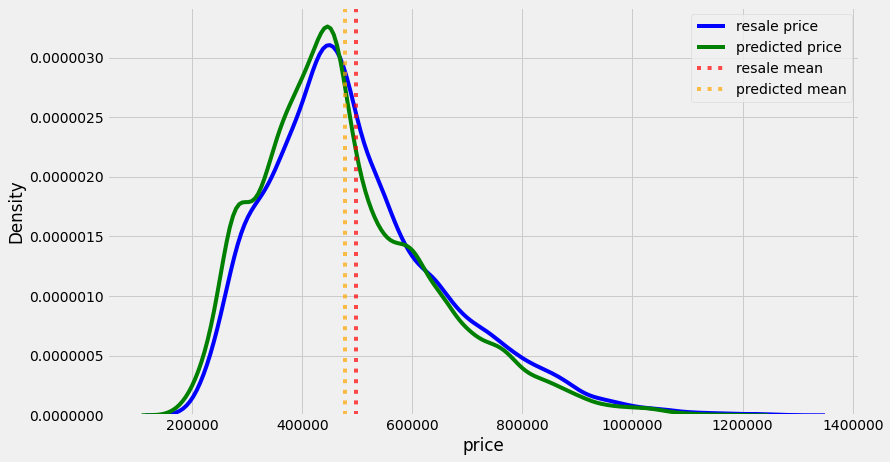

In [247]:
sns.kdeplot(x='resale_price', data=y_test_inv_df, color='blue')
#sns.kdeplot(data=y_pred_df[col_to_plot])
sns.kdeplot(x='GBR_three_mth_final', data=y_pred_df, color='green')
plt.axvline(x=y_test_inv_df['resale_price'].mean(), color='red', linestyle=':', alpha=0.7)
plt.axvline(x=y_pred_df['GBR_three_mth_final'].mean(), color='orange', linestyle=':', alpha=0.7)

plt.ticklabel_format(style='plain', axis='both')
plt.xlabel('price')
plt.legend(['resale price', 'predicted price', 'resale mean', 'predicted mean'])
plt.show()

### Plotting error distribution

In [73]:
error_df = y_pred_df.subtract(y_test_inv_df.squeeze(), axis=0)

In [191]:
error_df

GBR_no_ma_bm  GBR_one_mth_bm  GBR_three_mth_bm  Stack_no_ma_bm  \
0       9319.186430     4665.088489       7720.820264     4178.272823   
1       -221.231117    -1789.609231       -688.673018      206.209607   
2      78066.081796    34605.287029      38652.931511    78685.112173   
3     -23537.729798   -44350.390723     -46328.888592   -20803.099856   
4     -15783.127139   -29139.266145     -40652.231350   -16261.902252   
...             ...             ...               ...             ...   
20944 -67554.539715   -59760.684562     -61847.908174   -69372.775267   
20945 -41109.855131   -45271.160560     -44989.259854   -38356.594657   
20946 -40278.189752   -42868.516466     -34193.506562   -35599.963661   
20947 -11653.952470   -10128.763277     -12273.935153   -15000.212652   
20948 -95645.397062   -94845.572544     -91505.553251   -92932.488098   

       Stack_one_mth_bm  Stack_three_mth_bm  SVR_no_ma_bm  SVR_one_mth_bm  \
0          -2924.080290         -860.827430 -11734.943522   -20034.244306   
1          -2928.897553        -2408.366832  -1312.356377    -2778.072173   
2          36389.686233        38915.965013  35206.906962    26513.503859   
3         -41207.430420       -43526.020004 -28735.532463   -31975.436910   
4         -30041.217725       -40821.970456 -16952.095453   -18710.830378   
...                 ...                 ...           ...             ...   
20944     -61102.541139       -62638.567197 -93513.120766   -96597.044604   
20945     -40595.596150       -39995.892491 -39903.654624   -27069.708267   
20946     -37009.566017       -29024.713146 -29867.009150   -21702.006955   
20947     -12297.279274       -13854.059099 -29950.482624   -28893.792343   
20948     -91196.119233       -88027.099116 -94575.250731   -80590.919188   

       SVR_three_mth_bm  GBR_no_ma_fs  ...  Stack_three_mth_fs   SVR_no_ma_fs  \
0         -25028.278971  13514.664680  ...         9649.646673   -7371.222907   
1          -4556.874310   9297.838968  ...        -5704.816140   -5939.497267   
2          27578.857985  82824.367996  ...        11561.326367   43771.964796   
3         -34421.245674  -9691.567956  ...       -28084.852575  -25489.764650   
4         -23215.350050 -14865.525060  ...       -31477.899697  -18897.421159   
...                 ...           ...  ...                 ...            ...   
20944     -92434.374623 -70222.472533  ...       -71511.892784  -94497.896119   
20945     -24712.373728 -39204.686192  ...       -22172.019866  -35499.673640   
20946     -20579.265145 -47909.086346  ...       -31336.456847  -34963.957808   
20947     -25077.111434 -20625.081179  ...       -14594.088174  -29878.487799   
20948     -80901.909244 -84899.083099  ...       -78857.770226 -100179.184642   

       SVR_one_mth_fs  SVR_three_mth_fs  GBR_no_ma_final  GBR_one_mth_final  \
0       -18512.379413     -23251.359205    -13046.900259      -10112.232289   
1        -7094.595198      -9736.455778      5496.881259        3144.051316   
2        33174.494750      35978.505959     38219.070923       34107.757776   
3       -28010.931287     -29046.218877    -17614.153013      -22602.845583   
4       -18817.184815     -24327.093236    -17075.454064      -19608.591566   
...               ...               ...              ...                ...   
20944  -100730.651637     -98590.889695    -82776.748181      -76534.681527   
20945   -28438.875721     -22427.077627    -35188.994650      -46317.282844   
20946   -26354.138817     -21822.694958    -43146.785312      -40740.891798   
20947   -29691.514051     -25123.288898    -26413.616185      -22700.511717   
20948   -81394.474766     -77741.382158    -72793.427102      -73641.055506   

       GBR_three_mth_final  Stack_no_ma_final  Stack_one_mth_final  \
0             -8973.064191       19920.107282         14810.953545   
1               773.583986       10951.193264          9271.822968   
2             17881.177801       98225.703948         57930.951604   
3  

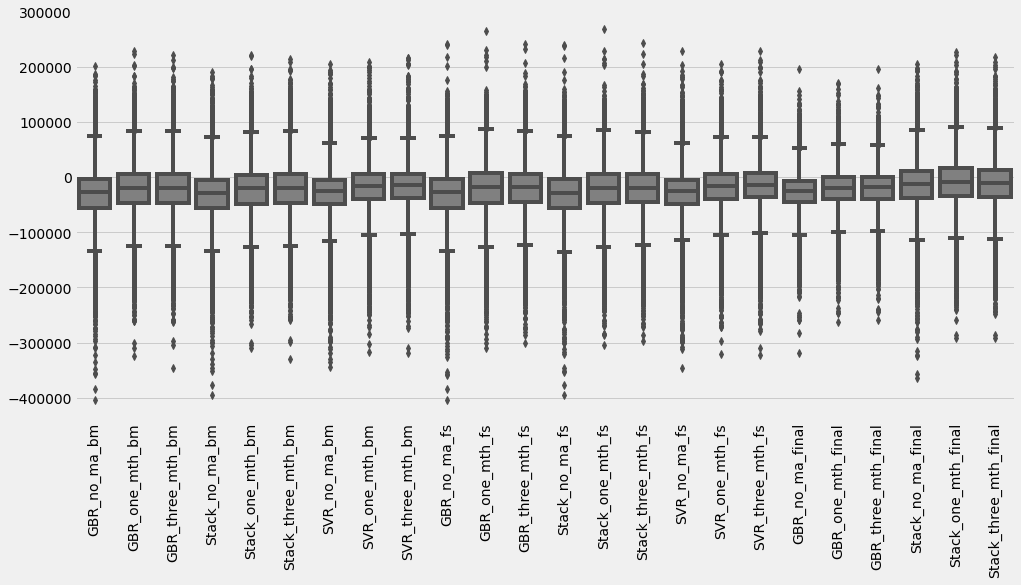

In [173]:
col_to_plot = ['GBR_no_ma_final', 'GBR_one_mth_final', 'GBR_three_mth_final']
plt.figure(figsize=(15,7))
sns.boxplot(data=error_df, color='gray')
plt.xticks(rotation=90)
plt.show()

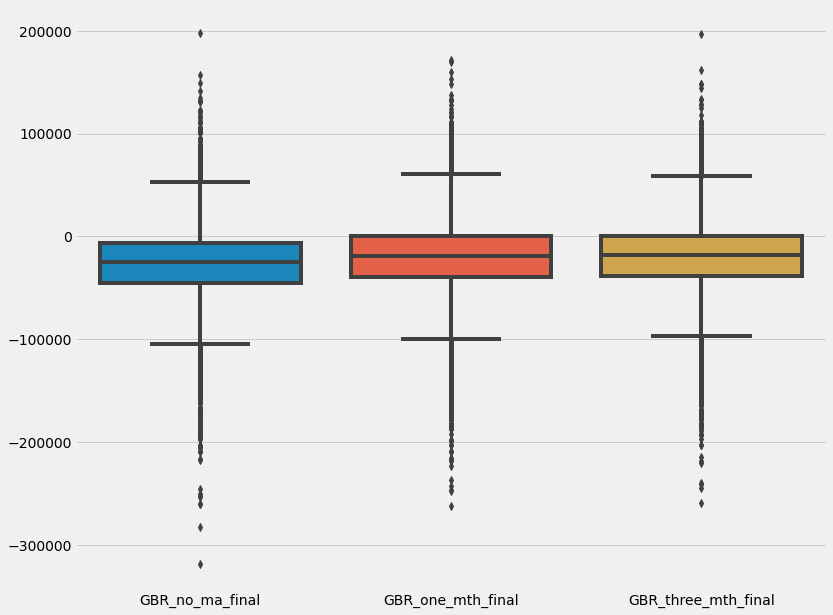

In [172]:
col_to_plot = ['GBR_no_ma_final', 'GBR_one_mth_final', 'GBR_three_mth_final']
plt.figure(figsize=(12,10))
sns.boxplot(data=error_df[col_to_plot])
#plt.xticks(rotation=90)
plt.show()

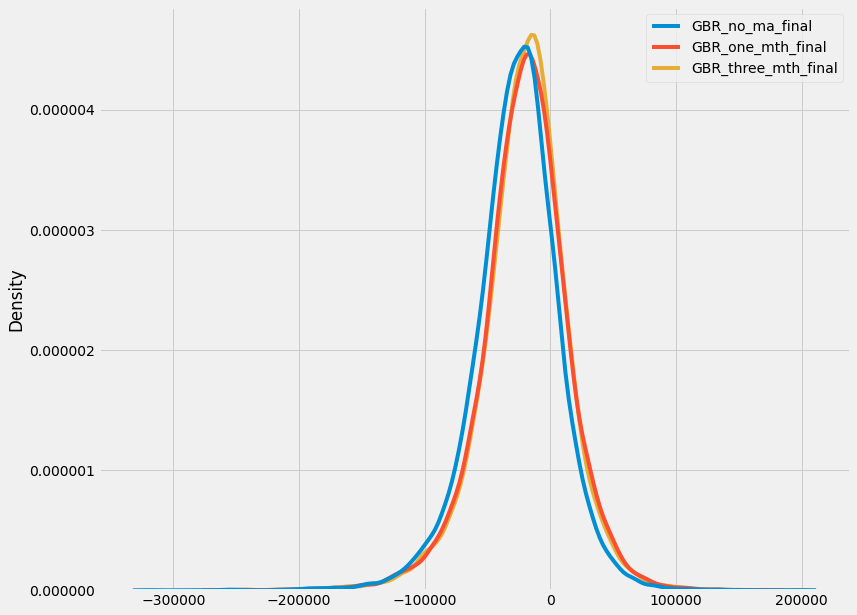

In [171]:
col_to_plot = ['GBR_no_ma_final', 'GBR_one_mth_final', 'GBR_three_mth_final']
plt.figure(figsize=(12,10))
sns.kdeplot(data=error_df[col_to_plot])
plt.ticklabel_format(style='plain', axis='y')
#plt.xticks(rotation=90)
plt.show()

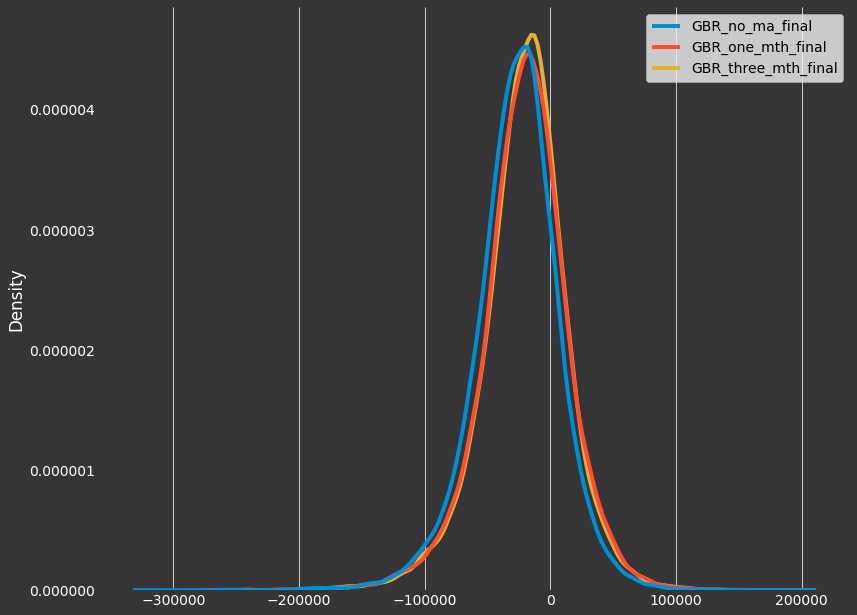

In [170]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
fig.patch.set_facecolor('#353537')
ax.set_facecolor('#353537')
[s.set_visible(False) for s in ax.spines.values()]
ax.tick_params(axis='both', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

col_to_plot = ['GBR_no_ma_final', 'GBR_one_mth_final', 'GBR_three_mth_final']
sns.kdeplot(data=error_df[col_to_plot])
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y')
#plt.xticks(rotation=90)
plt.show()

In [78]:
error_df[col_to_plot].describe()

GBR_no_ma_final  GBR_one_mth_final  GBR_three_mth_final
count     20949.000000       20949.000000         20949.000000
mean     -26691.732834      -20349.556804        -20197.499022
std       34386.630358       35258.304048         34593.601615
min     -318195.861562     -262489.339851       -259319.465485
25%      -45547.798003      -39636.067418        -38692.404573
50%      -25140.734082      -19055.156271        -18414.993668
75%       -5944.130006         643.086020           361.703320
max      197447.284411      171366.143910        197348.317420

### Reviewing prediction error over 100,000

In [213]:
data = pd.read_csv('capstone_dataset_final.csv', index_col='month', parse_dates=['month'])

In [214]:
data.columns

Index(['town', 'address', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'remaining_lease', 'distance_to_city', 'station_type',
       'distance_to_station', 'distance_to_mall', 'mature_estate',
       'new_supply_monthly', 'one_month_mov_avg', 'three_month_mov_avg',
       'resale_price'],
      dtype='object')

In [215]:
col_drop = ['distance_to_city', 'station_type',
       'distance_to_station', 'distance_to_mall', 'mature_estate',
       'new_supply_monthly']
data.drop(columns=col_drop, inplace=True)

In [216]:
data = data[data.index.date > datetime.date(2020, 10, 1)]

In [217]:
data['predicted_value'] = y_pred_df['GBR_one_mth_final'].values

In [218]:
data['difference'] = data['predicted_value'] - data['resale_price']

In [219]:
data[np.abs(data['difference']) > 100000][['difference']].describe()

difference
count     430.000000
mean  -110091.141036
std     70528.096944
min   -261631.111580
25%   -137611.731325
50%   -116824.611518
75%   -104865.570362
max    224684.147073

In [220]:
len(data[np.abs(data['difference']) > 100000])/len(data)

0.020526039429089694

### Evaluating moving average as a metric

In [224]:
price_col = ['one_month_mov_avg', 'three_month_mov_avg', 'resale_price']
data[data['town']=='ANG MO KIO'][price_col].describe()

one_month_mov_avg  three_month_mov_avg  resale_price
count         809.000000           809.000000  8.090000e+02
mean       426556.204786        420936.472404  4.320124e+05
std         13473.102071         10557.743314  1.687384e+05
min        409739.466667        396314.507918  2.090000e+05
25%        415006.711111        416323.175538  3.100000e+05
50%        424796.329412        421006.697652  3.660000e+05
75%        435967.688172        428915.143671  4.870000e+05
max        457865.217949        432638.929925  1.037000e+06

In [231]:
tempdf = data[(data['town']=='ANG MO KIO') & (data.index.month == 6)]
tempdf

town                address  flat_type  storey_range  \
month                                                                    
2021-06-30  ANG MO KIO   319 ANG MO KIO AVE 1          3             1   
2021-06-30  ANG MO KIO   332 ANG MO KIO AVE 1          3             3   
2021-06-30  ANG MO KIO   330 ANG MO KIO AVE 1          3             2   
2021-06-30  ANG MO KIO  308A ANG MO KIO AVE 1          3             9   
2021-06-30  ANG MO KIO  462 ANG MO KIO AVE 10          3             3   
...                ...                    ...        ...           ...   
2021-06-30  ANG MO KIO   101 ANG MO KIO AVE 3          5             3   
2021-06-30  ANG MO KIO   716 ANG MO KIO AVE 6          5             2   
2021-06-30  ANG MO KIO   716 ANG MO KIO AVE 6          5             1   
2021-06-30  ANG MO KIO   622 ANG MO KIO AVE 9          5             2   
2021-06-30  ANG MO KIO   614 ANG MO KIO AVE 4          6             1   

            floor_area_sqm      flat_model  remaining_lease  \
month                                                         
2021-06-30            73.0  New Generation        55.000000   
2021-06-30            68.0  New Generation        58.666667   
2021-06-30            68.0  New Generation        58.583333   
2021-06-30            70.0         Model A        90.333333   
2021-06-30            68.0  New Generation        57.750000   
...                    ...             ...              ...   
2021-06-30           117.0        Standard        55.750000   
2021-06-30           119.0        Improved        58.083333   
2021-06-30           119.0        Improved        58.083333   
2021-06-30           121.0        Improved        58.333333   
2021-06-30           149.0       Apartment        74.000000   

            one_month_mov_avg  three_month_mov_avg  resale_price  \
month                                                              
2021-06-30      457865.217949        432365.092632      307000.0   
2021-06-30      457865.217949        432365.092632      340000.0   
2021-06-30      457865.217949        432365.092632      310000.0   
2021-06-30      457865.217949        432365.092632      543000.0   
2021-06-30      457865.217949        432365.092632      328000.0   
...                       ...                  ...           ...   
2021-06-30      457865.217949        432365.092632      580000.0   
2021-06-30      457865.217949        432365.092632      595000.0   
2021-06-30      457865.217949        432365.092632      605000.0   
2021-06-30      457865.217949        432365.092632      558000.0   
2021-06-30      457865.217949        432365.092632      812000.0   

            predicted_value    difference  
month                                      
2021-06-30    297949.853466  -9050.146534  
2021-06-30    288887.353619 -51112.646381  
2021-06-30    282361.479447 -27638.520553  
2021-06-30    524318.924622 -18681.075378  
2021-06-30    277201.632960 -50798.367040  
...                     ...           ...  
2021-06-30    515397.123014 -64602.876986  
2021-06-30    586707.104406  -8292.895594  
2021-06-30    554695.998952 -50304.001048  
2021-06-30    492530.629327 -65469.370673  
2021-06-30    749535.633028 -62464.366972  

[77 rows x 12 columns]

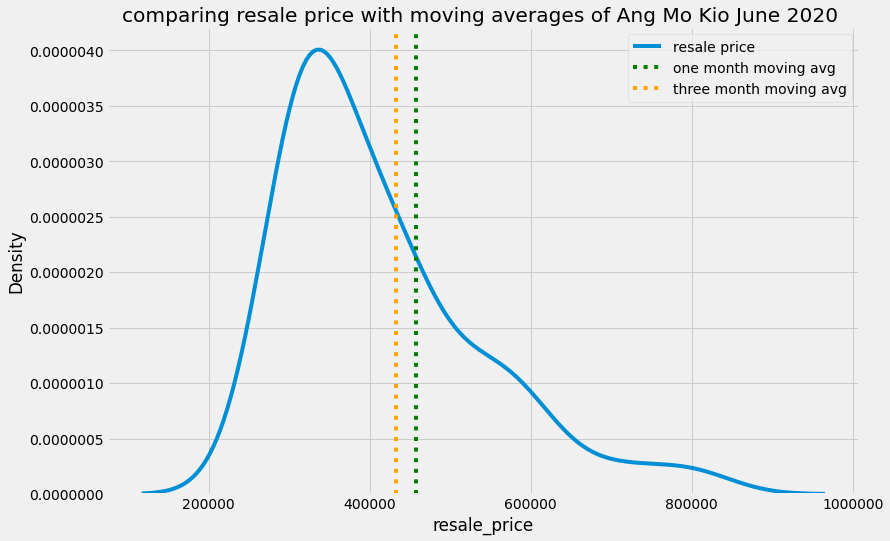

In [262]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=tempdf['resale_price'])
plt.ticklabel_format(style='plain', axis='both')
plt.axvline(x=tempdf['one_month_mov_avg'].mean(), color='green', linestyle=':')
plt.axvline(x=tempdf['three_month_mov_avg'].mean(), color='orange', linestyle=':')
#plt.axvline(x=tempdf['resale_price'].mean(), color='red', linestyle=':')

plt.legend(['resale price', 'one month moving avg', 'three month moving avg'])
plt.title('comparing resale price with moving averages of Ang Mo Kio June 2020 ')

plt.show()